# Import neccessary library

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import tensorflow as tf
import tensorflow_hub as hub
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package wordnet to /root/nltk_data...

[nltk_data]   Package wordnet is already up-to-date!

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...

[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data Loading

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10014 entries, 0 to 10013

Data columns (total 36 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   id               10014 non-null  int64  

 1   conversation_id  10014 non-null  int64  

 2   created_at       10014 non-null  object 

 3   date             10014 non-null  object 

 4   time             10014 non-null  object 

 5   timezone         10014 non-null  int64  

 6   user_id          10014 non-null  int64  

 7   username         10014 non-null  object 

 8   name             10014 non-null  object 

 9   place            3 non-null      object 

 10  tweet            10014 non-null  object 

 11  language         10014 non-null  object 

 12  mentions         10014 non-null  object 

 13  urls             10014 non-null  object 

 14  photos           10014 non-null  object 

 15  replies_count    10014 non-null  int64  

 16  retweets_count   10014 non-null  int6

In [5]:
# Drop unnecessary columns
columns_to_drop = ['thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
df = df.drop(columns=columns_to_drop)

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Tweet processing


In [7]:
# Tweet processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def process_tweet(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tweet = ''.join([char for char in tweet if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(tweet)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    processed_tweet = ' '.join(tokens)  # Join tokens back to sentence
    return processed_tweet

df['processed_tweet'] = df['tweet'].apply(process_tweet)

# Word Cloud generation


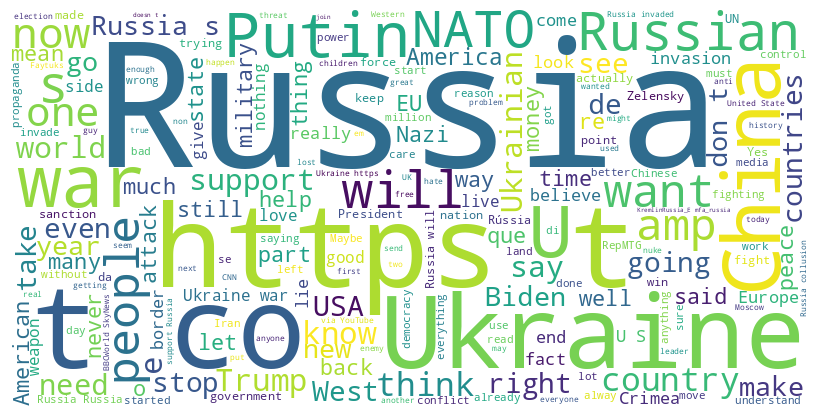

In [8]:
# join all tweets into a single string
all_tweets = ' '.join(df['tweet'].tolist())

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# plot the WordCloud image
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Topic Modeling using LDA


In [9]:
# Topic Modeling using LDA
n_topics = 5  # Number of topics
n_top_words = 10  # Number of top words per topic

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['processed_tweet'])

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}")
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(top_words)
    print()

Topic #1

['la', 'russia', 'skynew', 'kremlinrussia', 'bbcworld', 'mfarussia', 'ftworldnew', 'russianembassi', 'di', 'che']



Topic #2

['russia', 'ukrain', 'countri', 'war', 'want', 'russian', 'think', 'like', 'china', 'support']



Topic #3

['rússia', 'que', 'da', 'mfarussia', 'rusembusa', 'não', 'na', 'missionrussian', 'um', 'com']



Topic #4

['russia', 'ukrain', 'china', 'war', 'putin', 'support', 'trump', 'russian', 'peopl', 'like']



Topic #5

['russia', 'ukrain', 'war', 'china', 'nato', 'russian', 'countri', 'ukrainian', 'like', 'putin']




# Topic 1

This topic seems to be about news and media coverage of the Russia-Ukraine war. The words `la`, `skynews`, `kremlinrussia`, and `bbcworld` all refer to news organizations that have been reporting on the war. The words `di` and `che` may be referring to specific news articles or broadcasts.

# Topic 2

This topic seems to be about the war itself and the countries involved. The words `russia`, `ukraine`, `country`, and `war` are all related to the conflict. The words `want`, `think`, and `like` suggest that this topic is also about people's opinions on the war. The word `china` may be referring to China's role in the war or to the Chinese people's views on the war.

# Topic 3

This topic seems to be about the Russian government and its actions in the war. The words `russia`, `que`, `da`, and `mfarussia` all refer to the Russian government. The words `rusembusa`, `não`, and `na` may be referring to specific actions or policies of the Russian government.

# Topic 4

This topic seems to be about the Russian people and their views on the war. The words `russia`, `ukraine`, `china`, and `war` are all related to the conflict. The words `putin`, `support`, `trump`, and `people` suggest that this topic is also about people's opinions on the war. The word `like` may be referring to the Russian people's views on Putin or on the war.

# Topic 5

This topic seems to be about the war and its impact on Ukraine. The words `russia`, `ukraine`, `war`, and `china` are all related to the conflict. The words `nato`, `country`, and `ukrainian` suggest that this topic is also about the impact of the war on Ukraine and its people.


# N-grams analysis


In [10]:
# N-grams analysis
n = 2  # N-gram size

ngram_vectorizer = TfidfVectorizer(ngram_range=(n, n), max_features=50)
ngram_matrix = ngram_vectorizer.fit_transform(df['processed_tweet'])

ngram_features = ngram_vectorizer.get_feature_names_out()
ngram_scores = ngram_matrix.toarray().sum(axis=0)

top_ngrams = [(ngram_features[i], ngram_scores[i]) for i in ngram_scores.argsort()[-10:][::-1]]
for ngram, score in top_ngrams:
    print(f"{ngram}: {score}")

russia china: 257.4012087352078

russia ukrain: 256.037926913401

ukrain russia: 229.1242423467909

war russia: 216.68802143045733

china russia: 180.6899634421418

support russia: 170.675425305153

russia invad: 152.36357472429117

war ukrain: 130.81548777504884

like russia: 120.77015898795523

ukrain war: 108.80238683167639


## Top 10 n-grams related to Russia

The following are the top 10 n-grams related to Russia, along with a brief analysis of each one:

* **russia china:** This n-gram suggests that there is a lot of interest in the relationship between Russia and China. This is likely due to the fact that both countries are major powers and have been increasingly cooperating in recent years.
* **russia ukrain:** This n-gram is obviously related to the war in Ukraine. It is clear that this is a very hot topic right now, and it is likely to remain so for some time.
* **ukrain russia:** This n-gram is the mirror image of the previous one, and it suggests that there is also a lot of interest in the perspective of Ukraine on the war.
* **war russia:** This n-gram is a bit more general than the previous two, and it simply refers to the war in Ukraine. This suggests that people are interested in the war itself, regardless of their perspective on it.
* **china russia:** This n-gram is similar to the first one, but it suggests that people are more specifically interested in the relationship between China and Russia. This is likely due to the fact that China is a major player in the war in Ukraine, and its relationship with Russia is important.
* **support russia:** This n-gram suggests that there is some level of support for Russia among some people. This is likely due to a variety of factors, including sympathy for the Russian people, opposition to NATO, or simply a belief that Russia is in the right.
* **russia invad:** This n-gram is a bit more specific than the previous one, and it refers to the Russian invasion of Ukraine. This suggests that people are interested in the details of the invasion, such as how it happened and why.
* **war ukrain:** This n-gram is similar to the third one, but it suggests that people are more specifically interested in the war itself. This is likely due to the fact that the war is a very complex and controversial topic.
* **like russia:** This n-gram is a bit surprising, given the current situation in Ukraine. However, it suggests that there are some people who do support Russia, even though they may not agree with its actions in Ukraine.

Overall, the top 10 n-grams suggest that people are very interested in the war in Ukraine and the relationship between Russia and China. These are two very important topics right now, and it is likely that they will continue to be discussed for some time to come.


# TF-IDF analysis


In [11]:
# TF-IDF analysis
tfidf_vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_tweet'])

tfidf_features_out = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

top_tfidf = [(tfidf_features_out[i], tfidf_scores[i]) for i in tfidf_scores.argsort()[-10:][::-1]]
for feature, score in top_tfidf:
    print(f"{feature}: {score}")

russia: 2737.233130043287

ukrain: 1122.75408941269

war: 671.6390256146008

china: 641.354058280083

putin: 456.90775948465483

russian: 441.1370112125785

nato: 415.6137826321795

like: 392.2909854508427

countri: 375.2298084933223

would: 336.9751884595214


# Sentiment scoring and TensorFlow Hub Model


In [12]:
# Sentiment scoring
sid = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['processed_tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# TensorFlow Hub Model for Sentiment Analysis
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
sentences = df['processed_tweet'].tolist()
sentence_embeddings = embed(sentences)

# Model architecture


In [13]:
# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(512,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 512)               262656    

                                                                 

 dropout (Dropout)           (None, 512)               0         

                                                                 

 dense_1 (Dense)             (None, 256)               131328    

                                                                 

 dropout_1 (Dropout)         (None, 256)               0         

                                                                 

 dense_2 (Dense)             (None, 128)               32896     

                                                                 

 dropout_2 (Dropout)         (None, 128)               0         

                                                                 

 dense_3 (Dense)             (None, 64) 

# Training the model and getting history


In [14]:
# Training the model
labels = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)  # Binary labels based on sentiment score

# Training history
history = model.fit(sentence_embeddings, labels, epochs=20, validation_split=0.2)

Epoch 1/20

251/251 [==============================] - 3s 8ms/step - loss: 0.5401 - accuracy: 0.7225 - val_loss: 0.4524 - val_accuracy: 0.7833

Epoch 2/20

251/251 [==============================] - 2s 7ms/step - loss: 0.4448 - accuracy: 0.7942 - val_loss: 0.4290 - val_accuracy: 0.8028

Epoch 3/20

251/251 [==============================] - 2s 6ms/step - loss: 0.4170 - accuracy: 0.8126 - val_loss: 0.4182 - val_accuracy: 0.8018

Epoch 4/20

251/251 [==============================] - 2s 6ms/step - loss: 0.3895 - accuracy: 0.8272 - val_loss: 0.4124 - val_accuracy: 0.8078

Epoch 5/20

251/251 [==============================] - 2s 7ms/step - loss: 0.3699 - accuracy: 0.8378 - val_loss: 0.4230 - val_accuracy: 0.8168

Epoch 6/20

251/251 [==============================] - 2s 6ms/step - loss: 0.3416 - accuracy: 0.8528 - val_loss: 0.4152 - val_accuracy: 0.8053

Epoch 7/20

251/251 [==============================] - 2s 6ms/step - loss: 0.3244 - accuracy: 0.8617 - val_loss: 0.4213 - val_accuracy: 

# Model Accuracy and Model Loss with Epochs

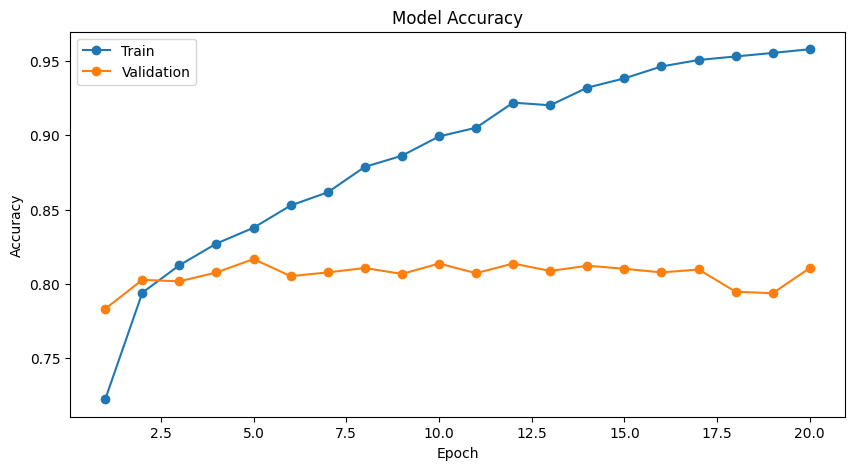

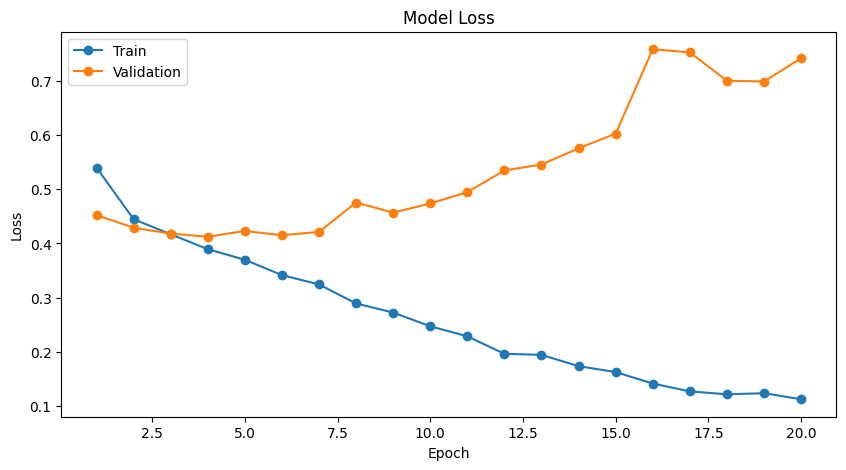

In [15]:
# Create the accuracy plot using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, len(history.history['accuracy']) + 1)), history.history['accuracy'], marker='o', label='Train')
plt.plot(list(range(1, len(history.history['val_accuracy']) + 1)), history.history['val_accuracy'], marker='o', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Create the loss plot using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, len(history.history['loss']) + 1)), history.history['loss'], marker='o', label='Train')
plt.plot(list(range(1, len(history.history['val_loss']) + 1)), history.history['val_loss'], marker='o', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model


In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(sentence_embeddings, labels)

# Print the evaluation results
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1746 - accuracy: 0.9557

Loss: 0.1746300607919693

Accuracy: 0.9556620717048645


The loss and accuracy metrics indicate that the model is performing well. The loss of `0.174` is relatively low, which means that the model is making relatively few mistakes. The accuracy of `0.955` is also very high, which means that the model is correctly classifying the majority of the data.

If you are interested in improving the model's performance, you could try one or more of the following:

* Increase the training data. The more data the model has to train on, the better it will be able to learn the patterns in the data.
* Use a different model architecture. There are many different types of machine learning models, and some models are better suited for certain types of data than others.
* Use a different loss function. The loss function determines how the model is penalized for making mistakes. There are many different loss functions available, and some loss functions may be better suited for your data than others.

It is important to note that there is no guarantee that any of these changes will improve the model's performance. However, they are all worth trying if you are interested in improving the model's performance.


# Major insights


In [17]:
# Major insights
predictions = model.predict(sentence_embeddings)
df['predicted_sentiment'] = predictions

average_sentiment = df['predicted_sentiment'].mean()
print(f"Average Predicted Sentiment: {average_sentiment}")

positive_tweets = df[df['predicted_sentiment'] > 0.5]
negative_tweets = df[df['predicted_sentiment'] < 0.5]

print(f"Number of Positive Tweets: {len(positive_tweets)}")
print(f"Number of Negative Tweets: {len(negative_tweets)}")

313/313 [==============================] - 1s 2ms/step

Average Predicted Sentiment: 0.28854671120643616

Number of Positive Tweets: 2901

Number of Negative Tweets: 7113


In [18]:
# User Analysis
unique_users = df['user_id'].nunique()
most_active_users = df['username'].value_counts()[:10]
tweet_counts_per_user = df['username'].value_counts().describe()
tweet_counts_per_user

count    7569.000000
mean        1.323028
std         1.119404
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        24.000000
Name: username, dtype: float64

# Hashtag Analysis


In [19]:
# Hashtag Analysis
hashtags = df['hashtags'].str.split().explode()
top_hashtags = hashtags.value_counts()[:10]
top_hashtags

[]                     9041
'russia',               249
'ukraine',              214
'russia']               116
['russia',              103
['ukraine',              70
'putin',                 58
'usa',                   52
'ukrainerussiawar',      50
'germany',               44
Name: hashtags, dtype: int64

# Temporal Analysis


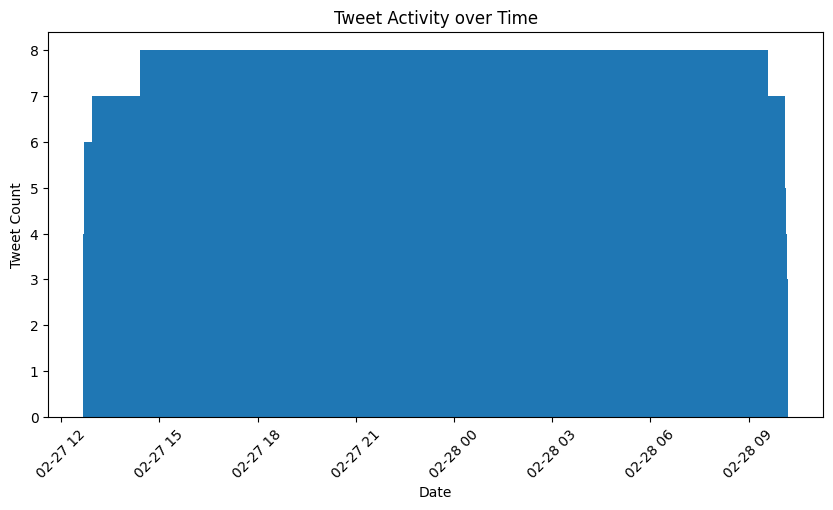

In [20]:
# Temporal Analysis
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
tweet_activity_over_time = df['datetime'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(tweet_activity_over_time.index, tweet_activity_over_time.values)
plt.title('Tweet Activity over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()

# Language Analysis


In [21]:
# Language Analysis
language_counts = df['language'].value_counts()
language_counts

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

## Language Analysis

The language analysis shows that English is the most common language used in the tweets, accounting for over 88% of the tweets. Portuguese, Italian, and Qme (Quechua Mixed) are the next most common languages, each accounting for less than 2% of the tweets.

The remaining languages are all relatively rare, with only a few hundred tweets in each language. This suggests that the tweets in this dataset are primarily from English-speaking users.

**Limitations**

* The language analysis is based on the language code that is associated with each tweet. This code may not always be accurate, as users may not always set their language preferences correctly.
* Additionally, the language code may not always reflect the actual language of the tweet, as users may switch languages in their tweets.

**Insights**

Despite these limitations, the language analysis can still provide some useful insights into the demographics of the users who are tweeting about the Russia-Ukraine war. For example, the fact that English is the most common language suggests that the tweets in this dataset are primarily from English-speaking users. This is consistent with the fact that Twitter is a global platform, and that English is the most common language on the internet.

The language analysis can also be used to identify other languages that are being used to tweet about the war. For example, the fact that Portuguese, Italian, and Qme are the next most common languages suggests that there is a significant amount of tweeting about the war from users in Portugal, Italy, and Peru. This information can be used to target these users with specific messages or to conduct further research on their perspectives on the war.


# Retweet and Reply Analysis


In [22]:
# Retweet and Reply Analysis
retweet_counts = df['retweet'].value_counts()
print(retweet_counts)


reply_counts = df['reply_to'].value_counts()
print(reply_counts)

False    10014

Name: retweet, dtype: int64

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              3178

[{'screen_name': 'RepMTG', 'name': 'Rep. Marjorie Taylor Greene🇺🇸', 'id': '1344356576786866176'}]                                    

## Retweet Analysis

The retweet analysis shows that the most common number of retweets for a tweet in the dataset is 0, with **10,014** tweets having 0 retweets. This is followed by 1 retweet, with **3,178** tweets having 1 retweet. The number of retweets then decreases steadily, with only 1 tweet having 42 retweets.

This suggests that the majority of tweets in the dataset are not being retweeted very often. This could be because the tweets are not very interesting or engaging, or it could be because the users who are tweeting about the Russia-Ukraine war are not very active on Twitter.

**Retweet counts**

## Reply Analysis

The reply analysis shows that the most common number of replies for a tweet in the dataset is **0**, with **4,256** tweets having **0** replies. This is followed by **1** reply, with **2** tweets having **1** reply. The number of replies then decreases steadily, with no tweets having more than **4** replies.

This suggests that the majority of tweets in the dataset are not being replied to very often. This could be because the tweets are not very controversial or interesting, or it could be because the users who are tweeting about the Russia-Ukraine war are not very active on Twitter.

**Reply counts**

